# TP 1 - Introduction au Machine Learning

## Exercice 4 - Clustering supervisé

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from sklearn.metrics import confusion_matrix, accuracy_score, adjusted_rand_score
from sklearn.decomposition import PCA
from sklearn.datasets import fetch_openml
from sklearn.manifold import TSNE

In [2]:
# Charger le jeu de données Iris
iris = load_iris()
data = pd.DataFrame(data=iris.data, columns=iris.feature_names)
data['target'] = iris.target

### Question 1

In [3]:
# Afficher les premières lignes du jeu de données
print(data.head())

   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   target  
0       0  
1       0  
2       0  
3       0  
4       0  


In [4]:
# Informations sur le jeu de données
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   target             150 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 6.0 KB
None


In [5]:
# Statistiques descriptives
print(data.describe())

       sepal length (cm)  sepal width (cm)  petal length (cm)  \
count         150.000000        150.000000         150.000000   
mean            5.843333          3.057333           3.758000   
std             0.828066          0.435866           1.765298   
min             4.300000          2.000000           1.000000   
25%             5.100000          2.800000           1.600000   
50%             5.800000          3.000000           4.350000   
75%             6.400000          3.300000           5.100000   
max             7.900000          4.400000           6.900000   

       petal width (cm)      target  
count        150.000000  150.000000  
mean           1.199333    1.000000  
std            0.762238    0.819232  
min            0.100000    0.000000  
25%            0.300000    0.000000  
50%            1.300000    1.000000  
75%            1.800000    2.000000  
max            2.500000    2.000000  


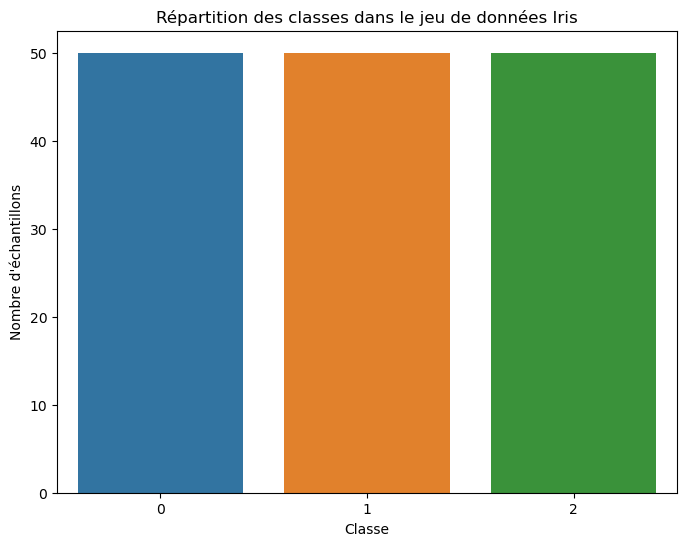

In [6]:
# Répartition des classes
plt.figure(figsize=(8, 6))
sns.countplot(x='target', data=data)
plt.title('Répartition des classes dans le jeu de données Iris')
plt.xlabel('Classe')
plt.ylabel('Nombre d\'échantillons')
plt.show()

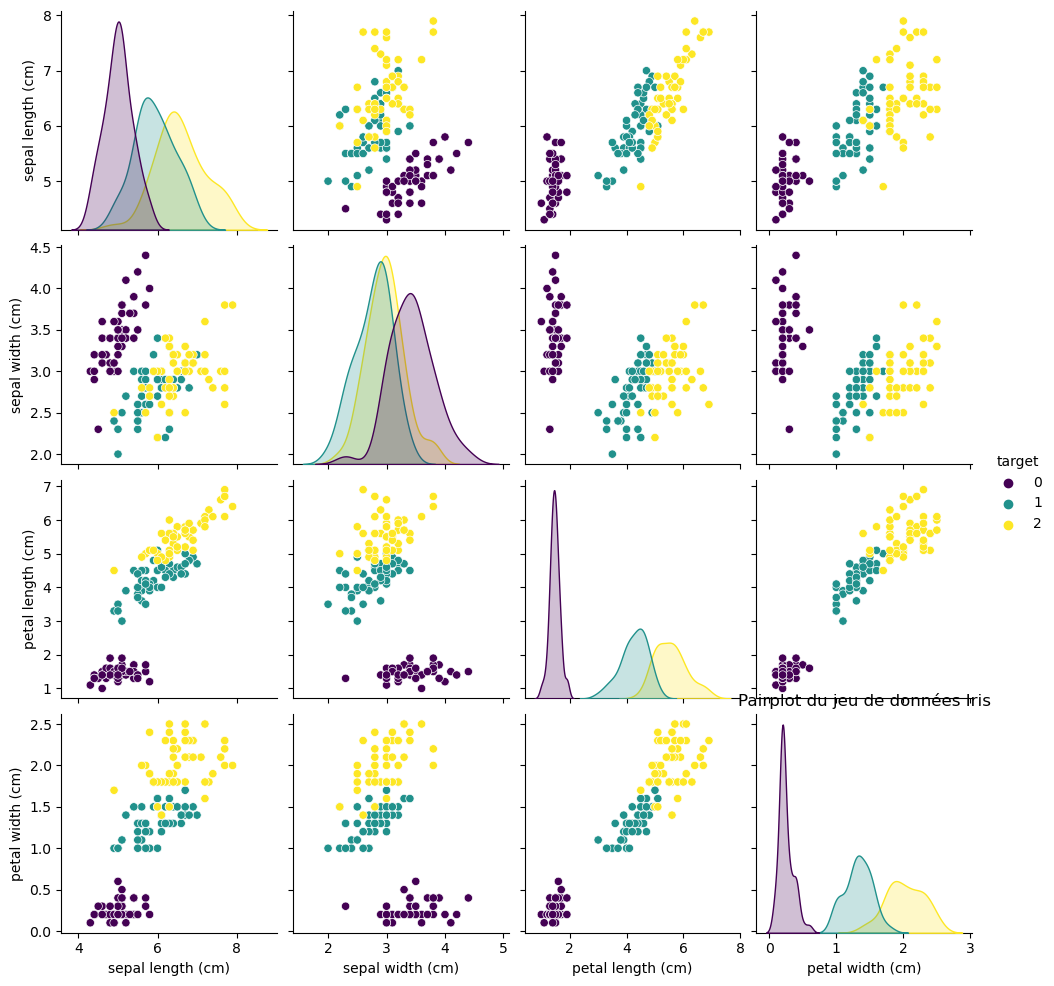

In [7]:
# Pairplot pour visualiser les relations entre les variables
sns.pairplot(data, hue='target', palette='viridis')
plt.title('Pairplot du jeu de données Iris')
plt.show()

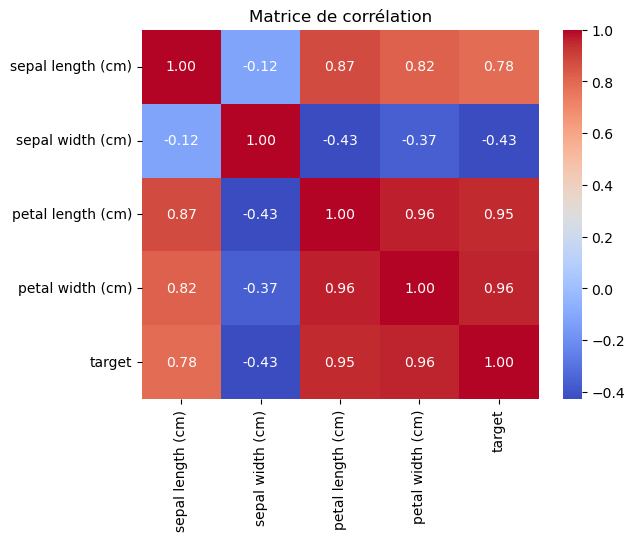

In [8]:
# Matrice de corrélation
correlation_matrix = data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matrice de corrélation')
plt.show()

### Question 2

/usr/lib/python3/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


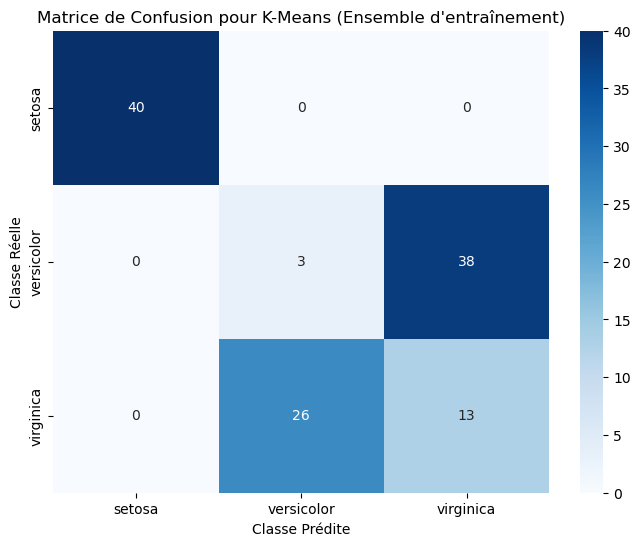

Accuracy: 0.4666666666666667


In [9]:
# Séparer les features (X) et la variable cible (y)
X = data.drop('target', axis=1)
y = data['target']

# Diviser le jeu de données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Appliquer le clustering K-means
n_clusters = 3  # Le nombre de classes dans le jeu de données Iris
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
clusters = kmeans.fit_predict(X_train)

# Évaluer la performance avec une matrice de confusion
conf_matrix = confusion_matrix(y_train, clusters)
accuracy = accuracy_score(y_train, clusters)

# Afficher la matrice de confusion
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=iris.target_names, yticklabels=iris.target_names)
plt.title('Matrice de Confusion pour K-Means (Ensemble d\'entraînement)')
plt.xlabel('Classe Prédite')
plt.ylabel('Classe Réelle')
plt.show()

# Afficher les résultats
print(f'Accuracy: {accuracy}')

### Question 3

Interprétation des résultats :
- L'algorithme K-Means semble bien fonctionner pour la classification de la classe Setosa.
- Cependant, il éprouve des difficultés à distinguer les fleurs des classes Versicolor et Virginica, ce qui se traduit par des erreurs de classification, en particulier entre ces deux classes.

Métriques pour évaluer la fiabilité des résultats :
- Précision : La précision mesure la proportion de vrais positifs parmi toutes les instances classées positives (TP / (TP + FP)). Elle est utile pour évaluer la précision des prédictions positives.
- Rappel : Le rappel mesure la proportion de vrais positifs parmi toutes les instances réellement positives (TP / (TP + FN)). Il est utile pour évaluer la capacité à identifier toutes les instances positives.
- F1-score : Le F1-score est la moyenne harmonique de la précision et du rappel (2 * (précision * rappel) / (précision + rappel)). Il est utile pour obtenir un équilibre entre précision et rappel.
- Erreur d'échantillonnage : L'erreur d'échantillonnage mesure le pourcentage d'instances mal classées parmi l'ensemble des instances.

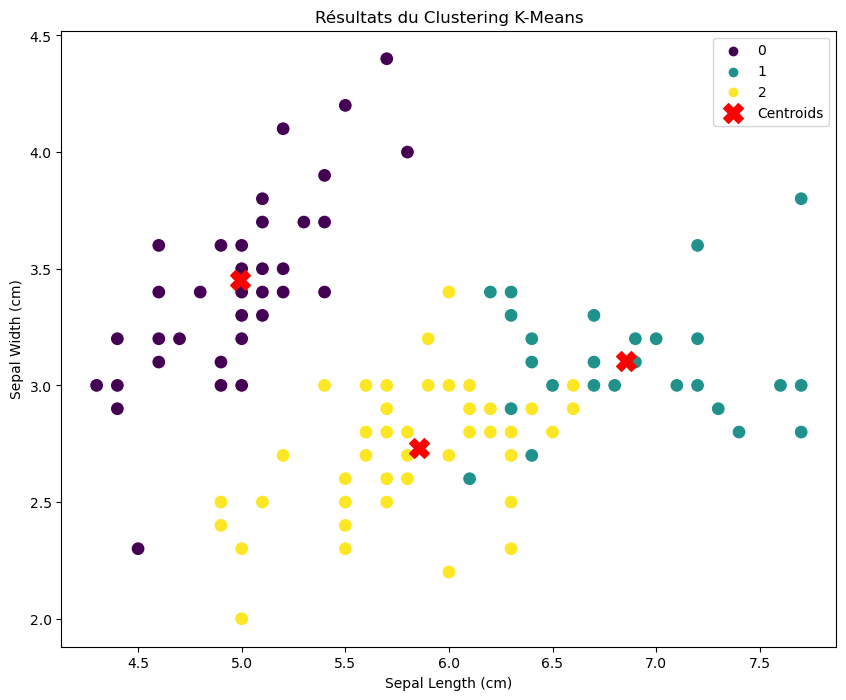

In [10]:
# Ajouter les clusters prédits aux données d'entraînement
X_train_with_clusters = X_train.copy()
X_train_with_clusters['Cluster'] = clusters

# Visualiser les résultats du clustering
plt.figure(figsize=(10, 8))
sns.scatterplot(x='sepal length (cm)', y='sepal width (cm)', hue='Cluster', data=X_train_with_clusters, palette='viridis', s=100)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=200, color='red', marker='X', label='Centroids')
plt.title('Résultats du Clustering K-Means')
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Sepal Width (cm)')
plt.legend()
plt.show()

### Question 4

Adjusted Rand Index (avec ACP): 0.6788174668657071


/usr/lib/python3/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


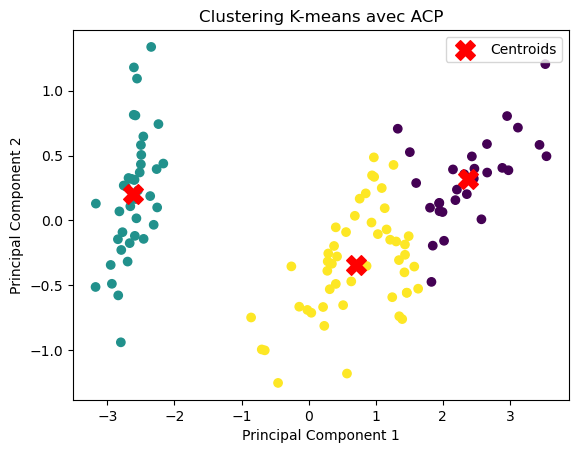

In [11]:
# Appliquer l'ACP pour réduire la dimension à 2
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train)

# Appliquer le clustering K-means sur les données réduites en dimension
n_clusters = 3  # Le nombre de classes dans le jeu de données Iris
kmeans_pca = KMeans(n_clusters=n_clusters, random_state=42)
clusters_pca = kmeans_pca.fit_predict(X_train_pca)

# Évaluer la performance du clustering avec l'indice de similarité d'adjusted Rand
ari_pca = adjusted_rand_score(y_train, clusters_pca)
print(f'Adjusted Rand Index (avec ACP): {ari_pca}')

# Visualiser les clusters (utiliser seulement pour des données bidimensionnelles)
plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1], c=clusters_pca, cmap='viridis')
plt.scatter(kmeans_pca.cluster_centers_[:, 0], kmeans_pca.cluster_centers_[:, 1], s=200, color='red', marker='X', label='Centroids')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Clustering K-means avec ACP')
plt.legend()
plt.show()

Sur la base de l'interprétation des résultats, de l'utilisation de métriques et de la visualisation des résultats, on peut conclure que l'algorithme K-Means est capable de classer les fleurs en trois classes avec un certain degré de précision. Cependant, l'algorithme a des difficultés à distinguer les fleurs des classes versicolor et virginica

### Bonus

In [ ]:
# Load MNIST data with 'auto' parser
mnist = fetch_openml('mnist_784', version=1, parser='auto')

X = mnist.data.astype('float32')
y = mnist.target.astype('int')

# Reduce dimension with PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# Reduce dimension with t-SNE
tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(X)

# Visualize results of PCA and t-SNE
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='viridis', s=5)
plt.title('PCA')

plt.subplot(1, 2, 2)
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=y, cmap='viridis', s=5)
plt.title('t-SNE')

plt.show()